# Piston Problem

Consider the piston problem, 

   <img src="../Figs/Piston.png" width="400" />

where the structure is initialized at the center of the tube at $\frac{L}{2}$, 
the fluid fills the left tube. And the cross section of the tube is assumed to be 1, 
and there is no variation in cross setion. Therefore, the problem is one-dimensional.

## Structure Governing Equation

The piston structure is of mass $m_s$, attached to a damper with damping coefficient $c_s$ and a spring with stiffness $k_s$ at $\frac{L}{2}$. The displacement of the piston $u$ is governed by 

$$m_s \ddot{u} + c_s \dot{u} + k_s u = f_{ext} $$



## Fluid Governing Equation
The fluid is governed by the Euler equation

\begin{align*}
\frac{\partial }{\partial t}
\begin{bmatrix}
\rho \\
\rho v\\
E
\end{bmatrix}
+
\frac{\partial }{\partial x}
\begin{bmatrix}
\rho v \\
\rho v^2 + p\\
(E + p)v
\end{bmatrix}
=0
\end{align*}
where $$E = \rho e + \frac{\rho v^2}{2} \qquad e = C_vT \qquad p = \rho R T$$

## Transmission condition

At the fluid structure interface, we have the no penetration condition

$$v(x_p(t)) = \dot {u}$$

and the force equilibrium condition

$$p(x_p(t)) = f_{ext}(t)$$


# Fluid Structure Coupling

The partition approach is applied with embedded/immersed boundary method for the coupled fluid-structure system.

   <img src="../Figs/Partitioned-Algorithm.png" width="400" />

The 2nd order explicit Runge-Kutta scheme is applied for the fluid, and the implicit mid-point rule is applied for the piston.

## Fluid

Assume the computational domain is $[0, L]$ with wall boundary conditions on both ends, 
the piston structure is initially at $\frac{L}{2}$ with prescribed motion $x_p(t)$. The flow is of constant density $\rho_0$, zero velocity $u_0 = 0$, and constant pressure $p_0$. 


### Finite Volume Method
The fluid governing equation is discretized by finite volume method. In the cell $\Omega_i$, we have 

\begin{align*}
\frac{\partial }{\partial t} \int_{\Omega_i}W dV + \int_{\partial \Omega_i} \mathcal{F}(W)\nu_i^F dS = 0
\end{align*}

here $W$ is the coservative state vector, $\mathcal{F}(W)$ is the flux, and  $\nu$ is the outward unit normal. Let denote the cell-averaged fluid state vector $W_i$, we have

\begin{align*}
|\Omega_i|\frac{\partial W_i}{\partial t} + \sum_{j\in \kappa(i)} |\partial \Omega_{ij}| \phi(W_{i},W_{j},\nu_{ij}) = 0
\end{align*}
here $\kappa(i) = \{i - 1, i + 1\}$ and $\phi$ denotes any numerical flux.

### 2nd Order Runge-Kutta Method (from $t_{n}$ to  $t_{n+1}$)


The semi-discretized fluid equation is advanced by the 2nd order Runge-Kutta method. 
- first Runge Kutta step
    $$\widetilde{W}^{n+1} = \widetilde{W}^{n+1} + \frac{\Delta t}{\Delta x} \Phi(W^n, u^{n^p}, \dot u^{n^p}) $$
- second Runge Kutta step
     
     \begin{align*}
      & \textrm{perform phase change for }  \widetilde{W}^{n+1} \textrm{ with structure displacement} (u^{n+1^p}, \dot u^{n+1^p}) \\
      &  W^{n+1} = \frac{1}{2}\Big( W^n + \widetilde{W}^{n+1} + \frac{\Delta t}{\Delta x} \Phi(\widetilde{W}^{n+1}, u^{n+1^p}, \dot u^{n+1^p}) \Big)
      \end{align*}

- perform phase change for ${W}^{n+1}$  with structure displacement  $(u^{n+1^p}, \dot u^{n+1^p})$

## Structure 

The structure is staggered by half time-step for improving the stability. The first half step is advanced:

\begin{align*}
&\ddot u^{\frac{1}{2}} = \frac{f_{ext}^{0} - k_s u^{0} - c_s\dot{u}^0}{m_s}              \\
&\dot u^{\frac{1}{2}}  = \dot u^{0} + \frac{\Delta t}{2} \ddot u^{0}                     \\
&     u^{\frac{1}{2}}  = u^{0} + \frac{\Delta t}{4}(\dot u^{0} + \dot u^{\frac{1}{2}})
\end{align*}

### Mid-point rule (from $t_{n+\frac{1}{2}}$ to  $t_{n+\frac{3}{2}}$)

The structure equation is advanced by the mid-point rule:

$$\begin{align*}
&m_s\ddot{u}^{n+1}  + c_s\dot{u}^{n+1} + k_s u^{n+1} = f_{ext}^{n+1}\\
&\dot{u}^{n+\frac{3}{2}} = \dot{u}^{n+\frac{1}{2}} + \frac{\Delta t}{2}(\ddot{u}^{n+\frac{1}{2}} + \ddot{u}^{n+\frac{3}{2}})\\
&u^{n+\frac{3}{2}} = u^{n+\frac{1}{2}} + \frac{\Delta t}{2}(\dot{u}^{n+\frac{1}{2}} + \dot{u}^{n+\frac{3}{2}}) = u^{n+\frac{1}{2}} + \Delta t\dot{u}^{n+\frac{1}{2}} + \frac{\Delta t^2}{4}(\ddot{u}^{n+\frac{1}{2}} + \ddot{u}^{n+\frac{3}{2}})  \\
&u^{n+1} = \frac{1}{2}(u^{n + \frac{1}{2}} + u^{n + \frac{3}{2}}) \\
&\dot u^{n+1} = \frac{1}{2}(\dot u^{n + \frac{1}{2}} + \dot u^{n + \frac{3}{2}}) \\
&\ddot u^{n+1} = \frac{1}{2}(\ddot u^{n + \frac{1}{2}} + \ddot u^{n + \frac{3}{2}}) \\
\end{align*}$$

We can solve for $\ddot{u}^{n+\frac{3}{2}}$ :

$$\ddot{u}^{n+\frac{3}{2}} = 
\frac{
f_{ext}^{n+1} - \frac{m_s}{2}\ddot{u}^{n+\frac{1}{2}} - \frac{c_s}{2}(2\dot u^{n+\frac{1}{2}} + \frac{\Delta t}{2}\ddot u^{n+\frac{1}{2}}) - \frac{k_s}{2}(2u^{n+\frac{1}{2}} + \Delta t \dot{u}^{n+\frac{1}{2}} + \frac{\Delta t^2}{4} \ddot{u}^{n+\frac{1}{2}})
}{
\frac{m_s}{2} + \frac{c_s}{2}\frac{\Delta t}{2} + \frac{k_s}{2}\frac{\Delta t^2}{4}
} $$

### Prediction for the half step 

\begin{align*}
&u^{n+1^p} = u^{n+\frac{1}{2}} + \frac{1}{2}\Delta t \dot{u}^{n+\frac{1}{2}} + \frac{1}{8}\Delta t( \dot{u}^{n+\frac{1}{2}} -  \dot{u}^{n-\frac{1}{2}})  \\
&{\dot u}^{n+1^p} =  \frac{3}{2}\dot{u}^{n+\frac{1}{2}} -  \frac{1}{2}\dot{u}^{n-\frac{1}{2}} \\
\end{align*}



Consider the piston is initially static, with 
$$m_s = 1 \qquad c_s = 0 \qquad k_s = 1$$

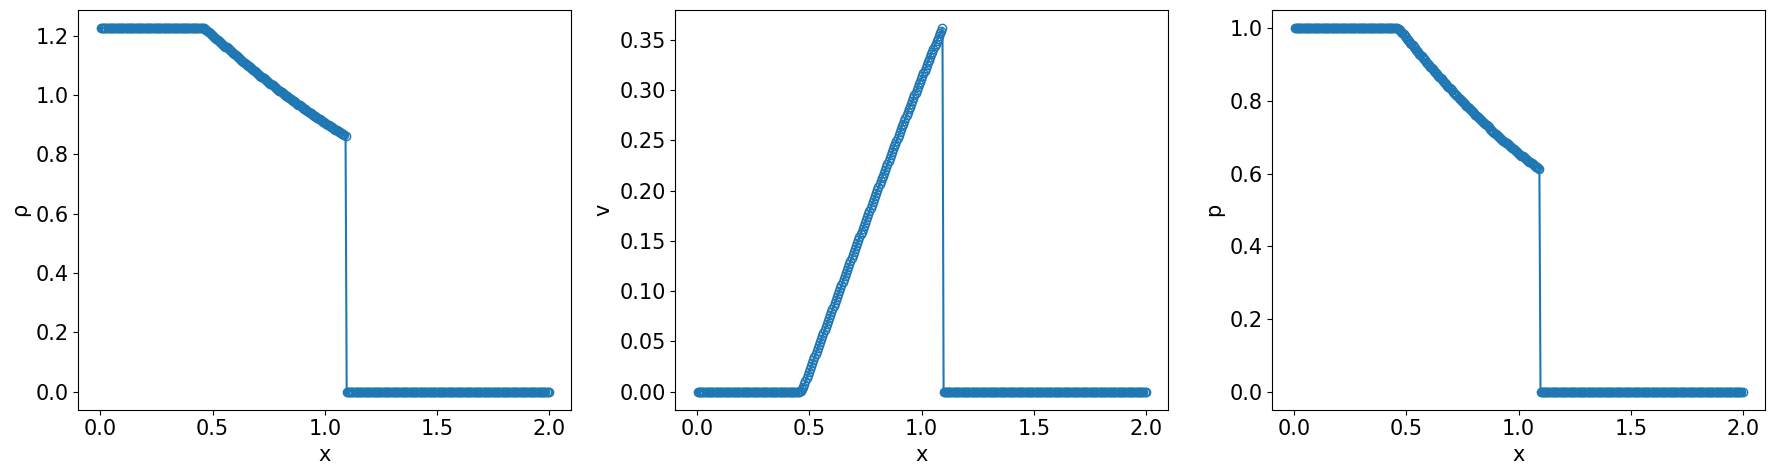

In [2]:
using PyPlot
include("FSI.jl")


L = 2.0
# number of cells
N = 400

# flow gas constant, intial density, velocity and pressure
γ, ρ0, v0, p0 = 1.4, 1.225, 0. , 1.0
fluid_info = [γ, ρ0, v0, p0] 
# piston mass, damping coefficient and spring stiffness
ms, cs, ks = 1.0, 0.0, 1.0
# initial displacement, velocity, and initial position
u0, v0, x0 = 0.0, 0.0, L/2
structure_info = [ms, cs, ks, u0, v0, x0, "AEROELASTIC", nothing] 

# time step and end time
Δt, T = 0.001, 0.5
time_info = [Δt, T]

fluid, piston, _, _ = Solve(L, N, fluid_info, structure_info, time_info;)
V = fluid.V
xx = fluid.xx

fig, ax = PyPlot.subplots(ncols=3, nrows=1, figsize=(18, 5))

ax[1].plot(xx, V[1, :], "-o", fillstyle = "none")
ax[2].plot(xx, V[2, :], "-o", fillstyle = "none")
ax[3].plot(xx, V[3, :], "-o", fillstyle = "none")
ax[1].set_xlabel("x")
ax[1].set_ylabel("ρ")
ax[2].set_xlabel("x")
ax[2].set_ylabel("v")
ax[3].set_xlabel("x")
ax[3].set_ylabel("p")
fig.tight_layout()

# Unscented Kalman Inversion

We want to infer the structure properties $m_s, c_s, k_s$ from the strucutre displacement measures.



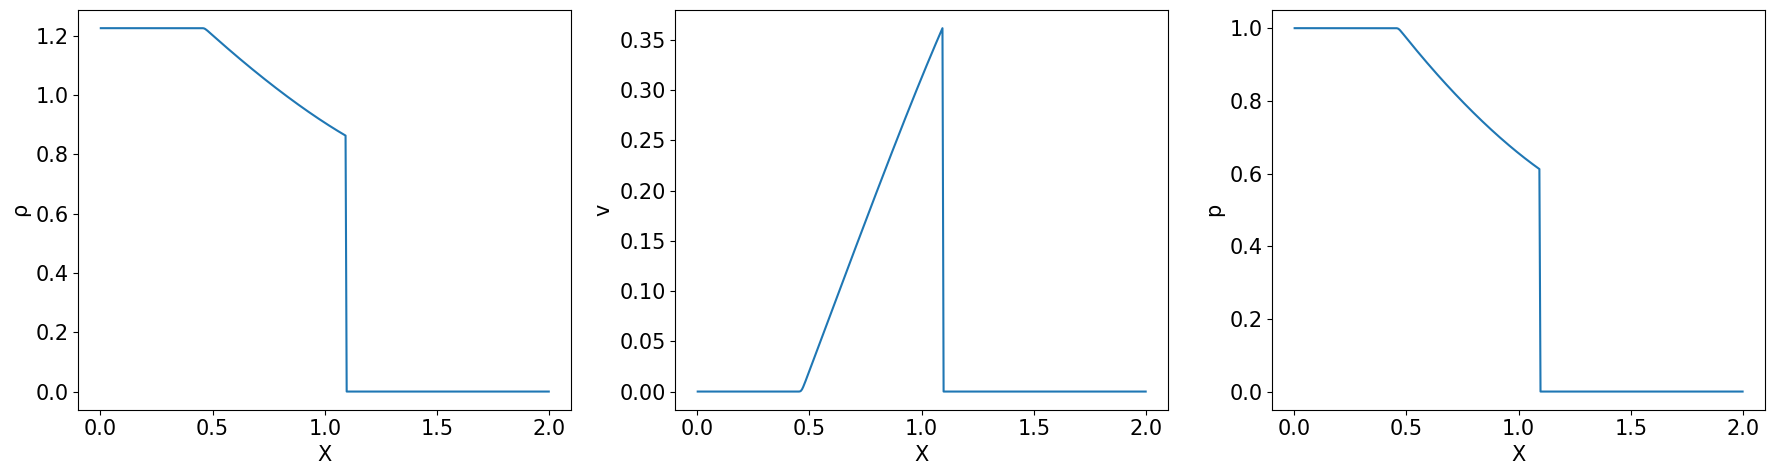

In [6]:
include("../Inversion/Plot.jl")
N, L = 400, 2.0

# flow gas constant, intial density, velocity and pressure
γ, ρ0, v0, p0 = 1.4, 1.225, 0. , 1.0
fluid_info = [γ, ρ0, v0, p0] 

# piston mass, damping coefficient and spring stiffness
ms, cs, ks = 1.0, 0.5, 2.0
θ_ref = [ms; cs; ks]
# initial displacement, velocity, and initial position
u0, v0, x0 = 0.0, 0.0, L/2
structure_info = [ms, cs, ks, u0, v0, x0, "AEROELASTIC", nothing] 

# time step and end time
Δt, T = 0.001, 1.0
N_T = Int64(T/Δt)
obs_freq = 50
time_info = [Δt, T]

fluid, piston, _, piston_history = Solve(L, N, fluid_info, structure_info, time_info; output_freq = 1)

# visualize the flow field
fig, ax = PyPlot.subplots(ncols=3, nrows=1, figsize=(18, 5))
ax[1].plot(xx, V[1, :], "-", fillstyle = "none")
ax[2].plot(xx, V[2, :], "-", fillstyle = "none")
ax[3].plot(xx, V[3, :], "-", fillstyle = "none")
ax[1].set_xlabel("X")
ax[1].set_ylabel("ρ")
ax[2].set_xlabel("X")
ax[2].set_ylabel("v")
ax[3].set_xlabel("X")
ax[3].set_ylabel("p")
fig.tight_layout()

Generate observation every 0.05 time, with 5 percents observation error

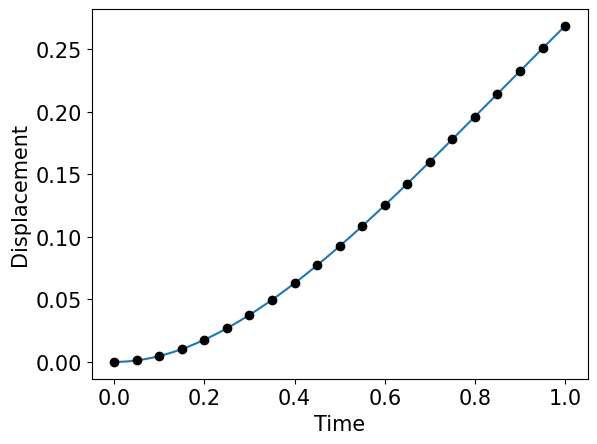

PyObject Text(30.0, 0.5, 'Displacement')

In [8]:
using Random
using Distributions

y_noiseless = piston_history[1, 1:obs_freq:end]

y = copy(y_noiseless)
noise_level = 0.0
N_y = length(y)
Random.seed!(123);
for i = 1:N_y
    noise = rand(Normal(0, noise_level*y[i]))
    y[i] += noise
end


# visualize the observation
PyPlot.figure()
tt = Array(LinRange(0, T, N_T+1))
PyPlot.plot(tt, piston_history[1, :])
PyPlot.plot(tt[1:obs_freq:end], y, "o", color="black")
PyPlot.xlabel("Time")
PyPlot.ylabel("Displacement")

In [17]:
include("../Inversion/KalmanInversion.jl")
piston = Setup_Param(N, L, 
time_info, fluid_info, 
θ_ref, ["ms", "cs", "ks"],
obs_freq)

N_y, N_θ = piston.N_y, piston.N_θ
# observation
Σ_η = Array(Diagonal(fill(0.1^2, N_y)))


# UKI 
θ0_mean = ones(Float64, N_θ) 
θθ0_cov = Array(Diagonal(fill(1.0^2.0, N_θ)))
N_iter = 30
α_reg = 1.0
update_freq = 1
ukiobj = UKI_Run(piston, forward, θ0_mean, θθ0_cov, y, Σ_η, α_reg, update_freq, N_iter)


fig, (ax1, ax2, ax3) = PyPlot.subplots(ncols=3, figsize=(18,6))
ites = Array(LinRange(1, N_iter, N_iter))
errors = zeros(Float64, (3, N_iter))
for i = 1:N_iter
    errors[1, i] = norm(piston.θ_ref - ukiobj.θ_mean[i])/norm(piston.θ_ref)
    errors[2, i] = 0.5*(ukiobj.y_pred[i] - ukiobj.y)'*(ukiobj.Σ_η\(ukiobj.y_pred[i] - ukiobj.y))
    errors[3, i] = norm(ukiobj.θθ_cov[i])
end

ax1.semilogy(ites, errors[1, :], "-o", fillstyle="none", markevery=2, label= "UKI")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Relative L₂ norm error of logκ")
ax1.legend()
ax1.grid(true)

ax2.semilogy(ites, errors[2, :], "-o", fillstyle="none", markevery=2, label= "UKI")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Optimization error")
ax2.grid(true)
ax2.legend()

ax3.semilogy(ites, errors[3, :], "-o", fillstyle="none", markevery=2, label= "UKI")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Frobenius norm of covariance")
ax3.grid(true)
ax3.legend()
fig.tight_layout()



LoadError: [91mTaskFailedException:[39m
[91m[91mBoundsError: attempt to access 3×400 Array{Float64,2} at index [1:3, 401][39m[39m
[91mStacktrace:[39m
[91m [1] [1mthrow_boundserror[22m[1m([22m::Array{Float64,2}, ::Tuple{Base.Slice{Base.OneTo{Int64}},Int64}[1m)[22m at [1m./abstractarray.jl:541[22m[39m
[91m [2] [1mcheckbounds[22m at [1m./abstractarray.jl:506[22m [inlined][39m
[91m [3] [1m_getindex[22m at [1m./multidimensional.jl:742[22m [inlined][39m
[91m [4] [1mgetindex[22m at [1m./abstractarray.jl:1060[22m [inlined][39m
[91m [5] [1mCompute_Rhs_Muscl[22m[1m([22m::Euler1D{Float64,Int64}, ::Array{Float64,2}, ::Int64, ::Float64[1m)[22m at [1m/Users/huang/Desktop/Code/InverseProblems-master.jl/FSI-Piston/Euler1D.jl:372[22m[39m
[91m [6] [1mCompute_Rhs_Muscl[22m at [1m/Users/huang/Desktop/Code/InverseProblems-master.jl/FSI-Piston/Euler1D.jl:320[22m [inlined][39m
[91m [7] [1mFluid_Time_Advance![22m[1m([22m::Euler1D{Float64,Int64}, ::Array{Float64,1}, ::Float64, ::Float64[1m)[22m at [1m/Users/huang/Desktop/Code/InverseProblems-master.jl/FSI-Piston/Euler1D.jl:475[22m[39m
[91m [8] [1mSolve[22m[1m([22m::Float64, ::Int64, ::Array{Float64,1}, ::Array{Any,1}, ::Array{Float64,1}; output_freq::Int64[1m)[22m at [1m/Users/huang/Desktop/Code/InverseProblems-master.jl/FSI-Piston/FSI.jl:65[22m[39m
[91m [9] [1mforward[22m[1m([22m::Setup_Param{Float64,Int64}, ::Array{Float64,1}[1m)[22m at [1m/Users/huang/Desktop/Code/InverseProblems-master.jl/FSI-Piston/FSI.jl:151[22m[39m
[91m [10] [1mmacro expansion[22m at [1m/Users/huang/Desktop/Code/InverseProblems-master.jl/Inversion/KalmanInversion.jl:17[22m [inlined][39m
[91m [11] [1m(::var"#21#threadsfor_fun#13"{Setup_Param{Float64,Int64},Array{Float64,2},typeof(forward),Array{Float64,2},UnitRange{Int64}})[22m[1m([22m::Bool[1m)[22m at [1m./threadingconstructs.jl:81[22m[39m
[91m [12] [1m(::var"#21#threadsfor_fun#13"{Setup_Param{Float64,Int64},Array{Float64,2},typeof(forward),Array{Float64,2},UnitRange{Int64}})[22m[1m([22m[1m)[22m at [1m./threadingconstructs.jl:48[22m[39m